### Importing Module and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


In [2]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Understanding Dataset

In [3]:
df.shape

(5572, 2)

In [4]:
df.ndim

2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.dtypes

Category    object
Message     object
dtype: object

In [9]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.isna().any()

Category    False
Message     False
dtype: bool

<AxesSubplot:>

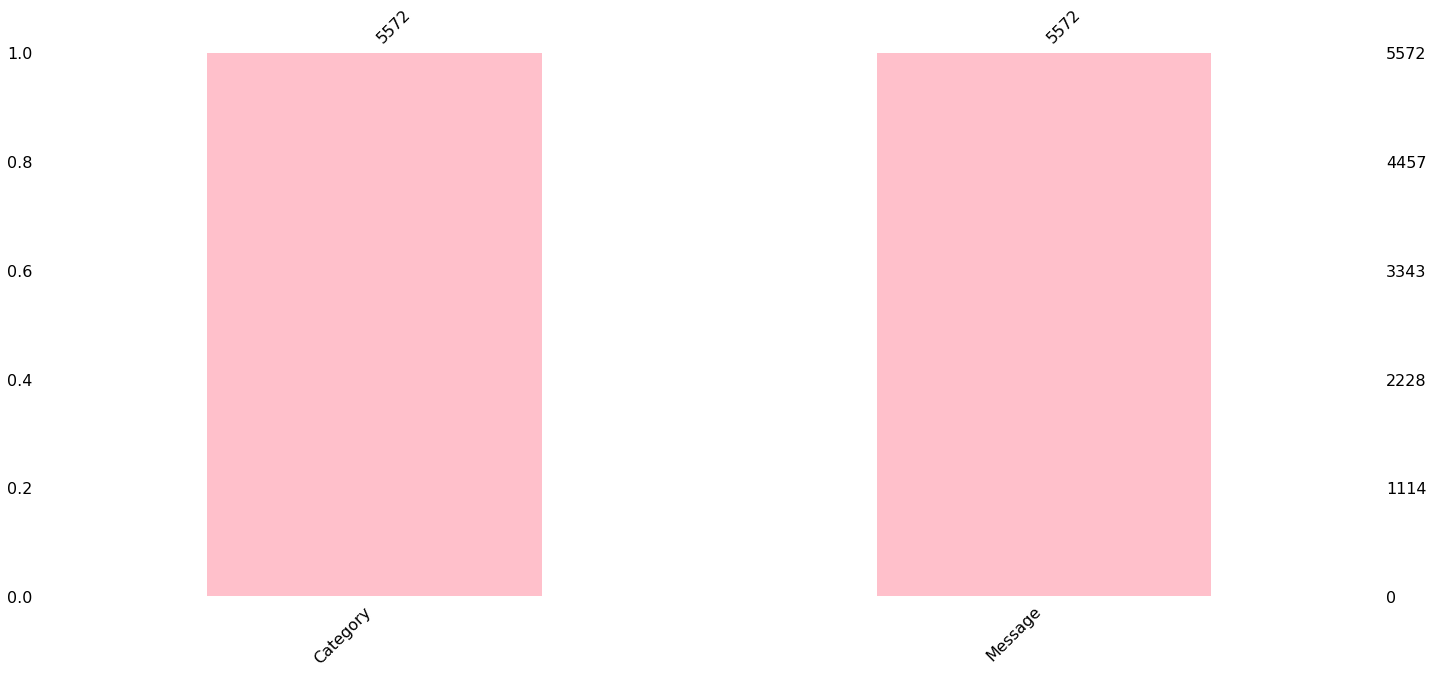

In [11]:
import missingno as mnso
mnso.bar(df,color='pink')

### Data Visualization

In [12]:
df["Msg_len"]=df["Message"].apply(len)

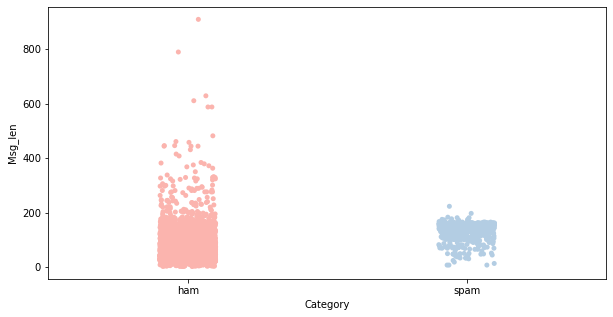

In [13]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df, y='Msg_len',x='Category', palette='Pastel1')
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Msg_len'>

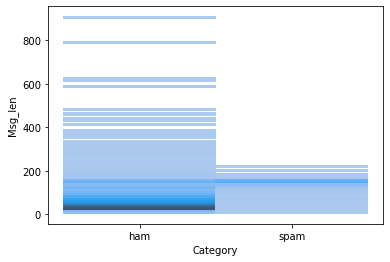

In [14]:
sns.histplot(data=df, y='Msg_len',x='Category', palette='Pastel1', kde=True)

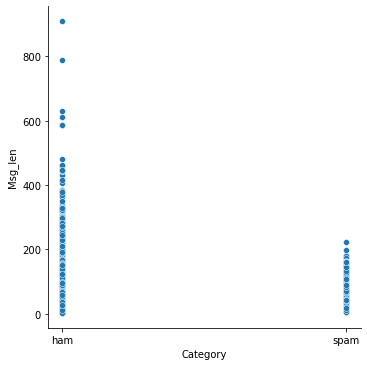

In [15]:
sns.relplot(data=df,y='Msg_len',x='Category', palette='Pastel1')

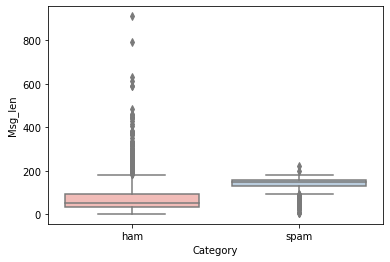

In [16]:
sns.boxplot(data=df,y='Msg_len',x='Category', palette='Pastel1')
plt.show()

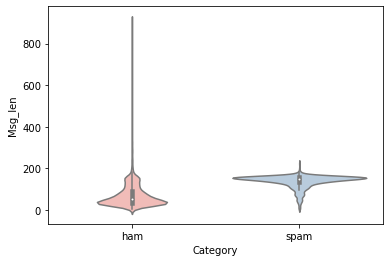

In [17]:
sns.violinplot(data=df,y='Msg_len',x='Category', palette='Pastel1')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


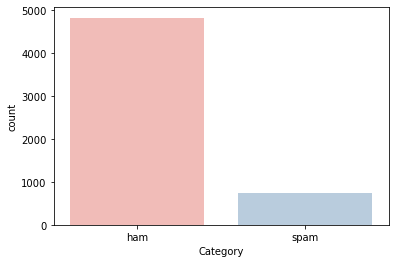

In [18]:
sns.countplot(df.Category, palette='Pastel1')
plt.show()

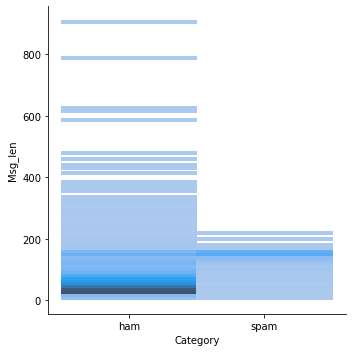

In [19]:
sns.displot(data=df, y='Msg_len',x='Category', palette='Pastel1')

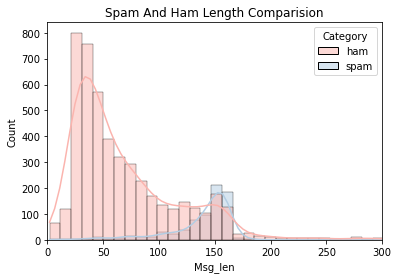

In [20]:

sns.histplot(x=df["Msg_len"],hue=df["Category"],kde=True, palette='Pastel1')
plt.xlim(0,300)
plt.title("Spam And Ham Length Comparision")
plt.show()

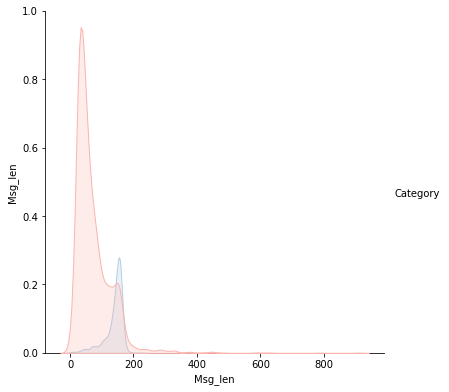

In [21]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Category',height=5.5,palette='Pastel1')
plt.show()

### Data Preprocessing

In [22]:
import  yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

In [23]:
df.Category =label_Enc.fit_transform(df.Category)

In [24]:
label_Enc.classes_

array(['ham', 'spam'], dtype=object)

In [25]:
df.head()

,Category,Message,Msg_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


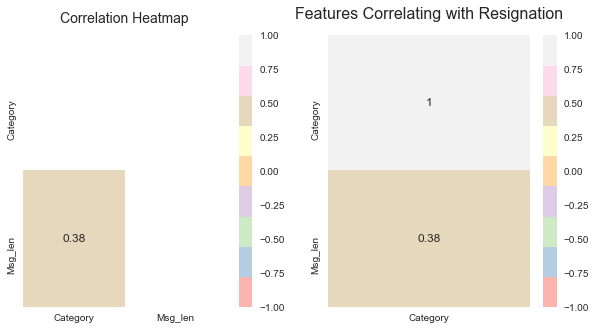

In [26]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Category']].sort_values(by='Category',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

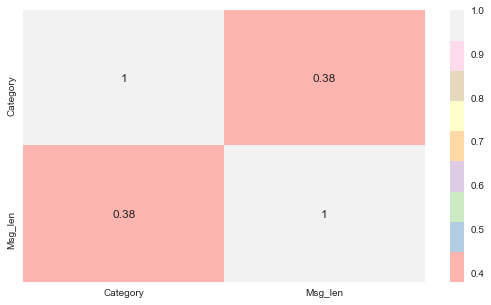

In [27]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

<Figure size 216x288 with 0 Axes>

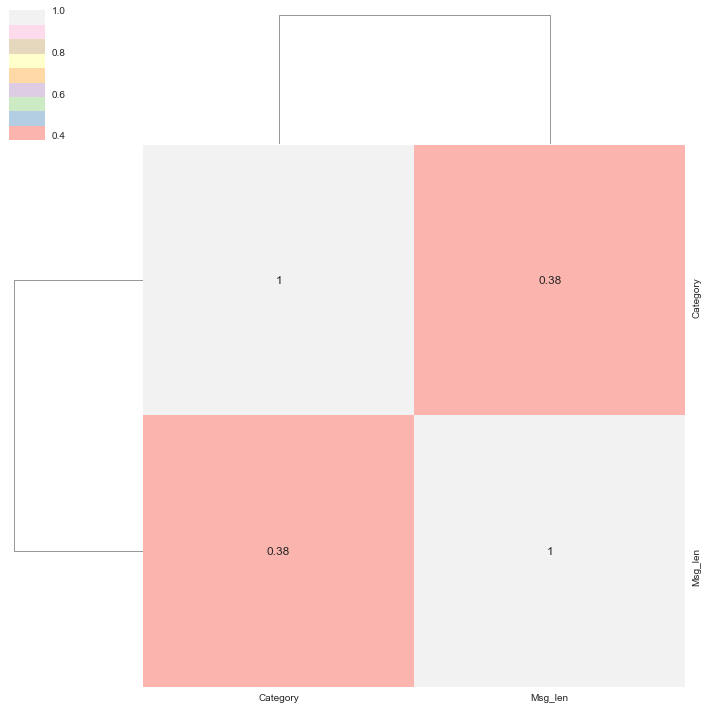

In [28]:
plt.figure(figsize=(3,4))
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')

### Multiomial Naive Bayes Classifier

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf=TfidfVectorizer('english')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [31]:
x=df['Message']
X=tfidf.fit_transform(x)
y=df['Category']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf=MultinomialNB(alpha=0.1)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [35]:
mnb_clf.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [36]:
y_pred=mnb_clf.predict(X_test)

In [37]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.9856502242152466


In [38]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.9261744966442953


In [39]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.965034965034965


In [40]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.9452054794520547


### ROC Curve

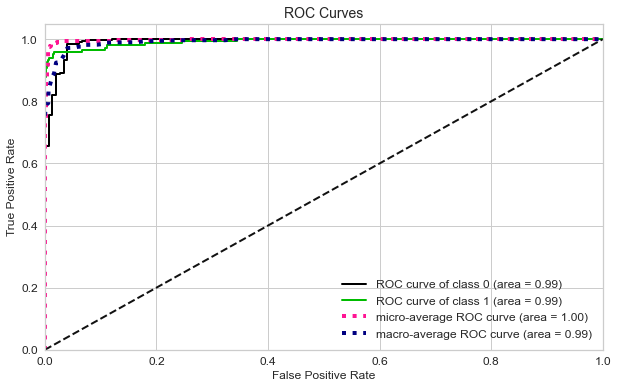

In [41]:
y_probas = mnb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Precision Recall Curve

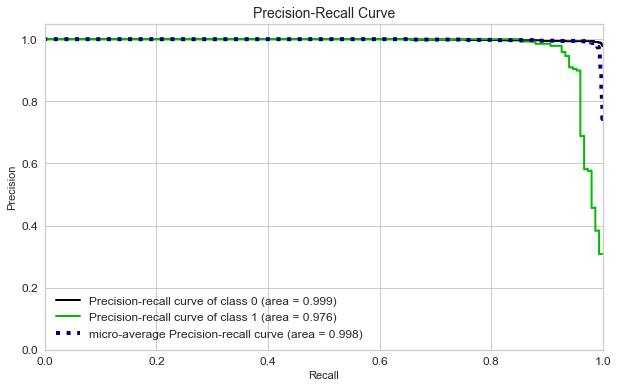

In [42]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Learning Curve

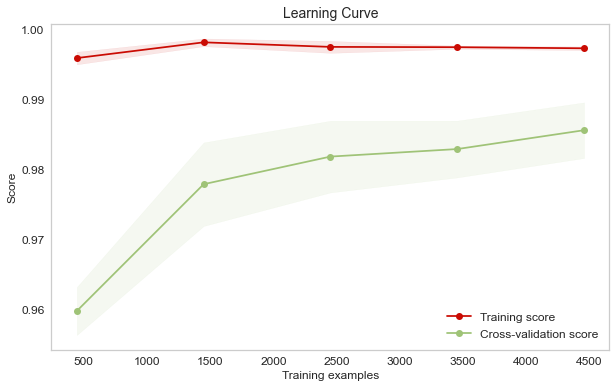

In [43]:
skplt.estimators.plot_learning_curve(mnb_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Lift Curve

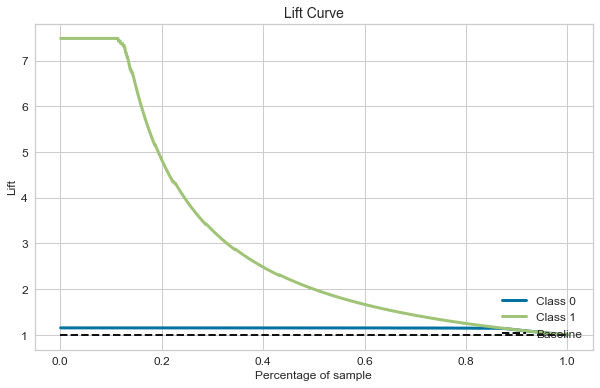

In [44]:
skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Confusion Matrix

In [45]:
confusion_matrix(y_test, y_pred)

array([[961,   5],
       [ 11, 138]], dtype=int64)

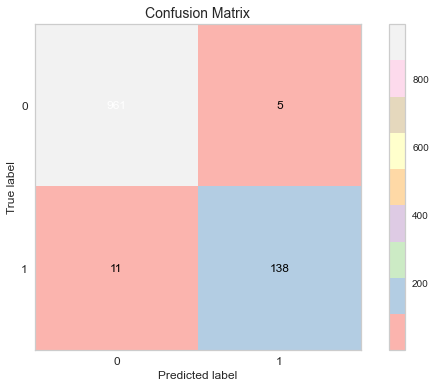

In [46]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



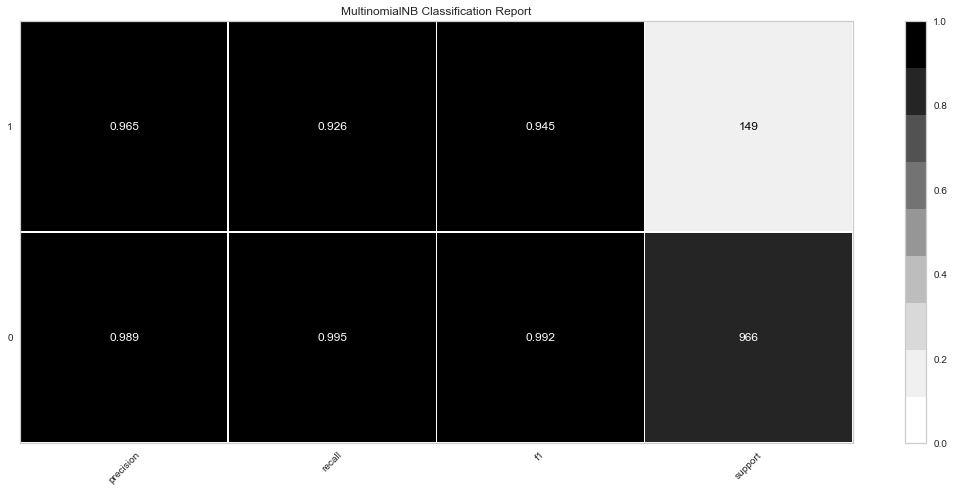

In [48]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(mnb_clf, X_train, y_train, X_test, y_test,  support=True,cmap="Greys")
visualizer.show()
plt.show()